<a href="https://colab.research.google.com/github/omshrivastava26/BRAIN-AND-COGNITIVE-SOCIETY-TASK-NEURAL-NETWORK/blob/master/DIGIT%20RECOGNIZER%20WITH%20NO%20FRAMEOWORK%20ONLY%20MATHS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('/content/trainmath.csv')


In [88]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
data = np.array(data)
m, n = data.shape #row and column ,also n is feature +1(index)
np.random.shuffle(data) # shuffle before splitting into dev and training sets

#splitting the data set
data_dev = data[0:1000].T #each column is example
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255. 

data_train = data[1000:m].T #rest of data
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [90]:
Y_train

array([1, 4, 9, ..., 1, 2, 2])

In [91]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 #0.5 subtracted to handle range
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp = np.exp(Z - np.max(Z)) 
    return exp / exp.sum(axis=0)
    
    

In [92]:
def forward_prop(W1, b1, W2, b2, X): 
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def newmatrix(Y):
    newmatrix_Y = (np.zeros((Y.size, Y.max() + 1)))
    newmatrix_Y[(np.arange(Y.size), Y)] = 1
    newmatrix_Y = newmatrix_Y.T
    return newmatrix_Y

In [93]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    newmatrix_Y = newmatrix((Y))
    dZ2 = 2*(A2 - newmatrix_Y)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1   #updating the weight and bias
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [94]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0: #basically to print every 10th iteration
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [95]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 9 4 ... 7 9 7] [1 4 9 ... 1 2 2]
0.08370731707317074
Iteration:  10
[1 9 9 ... 2 2 7] [1 4 9 ... 1 2 2]
0.23509756097560974
Iteration:  20
[1 6 6 ... 1 2 7] [1 4 9 ... 1 2 2]
0.37714634146341464
Iteration:  30
[1 6 6 ... 1 1 7] [1 4 9 ... 1 2 2]
0.4939268292682927
Iteration:  40
[1 6 6 ... 1 1 7] [1 4 9 ... 1 2 2]
0.5789756097560975
Iteration:  50
[1 6 8 ... 1 1 7] [1 4 9 ... 1 2 2]
0.6434390243902439
Iteration:  60
[1 6 8 ... 1 1 7] [1 4 9 ... 1 2 2]
0.6864878048780488
Iteration:  70
[1 4 8 ... 1 1 7] [1 4 9 ... 1 2 2]
0.7172926829268292
Iteration:  80
[1 4 8 ... 1 1 7] [1 4 9 ... 1 2 2]
0.7410731707317073
Iteration:  90
[1 4 8 ... 1 1 7] [1 4 9 ... 1 2 2]
0.7585121951219512
Iteration:  100
[1 4 8 ... 1 1 7] [1 4 9 ... 1 2 2]
0.7735853658536586
Iteration:  110
[1 4 8 ... 1 1 7] [1 4 9 ... 1 2 2]
0.785829268292683
Iteration:  120
[1 4 8 ... 1 1 7] [1 4 9 ... 1 2 2]
0.7953902439024391
Iteration:  130
[1 4 8 ... 1 1 7] [1 4 9 ... 1 2 2]
0.803609756097561
Iteration:  140


In [96]:
def makepredict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def testpredict(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = makepredict(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    #to print image this code i copied from internetnet
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


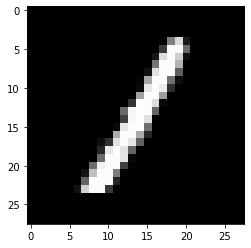

Prediction:  [4]
Label:  4


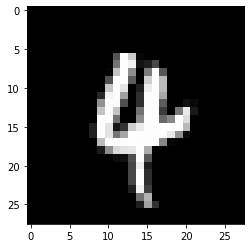

In [97]:
testpredict(0, W1, b1, W2, b2)
testpredict(1, W1, b1, W2, b2)

In [101]:
#dev_predictions = makepredict(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)*100

[8 2 2 1 8 0 4 4 1 3 4 9 8 1 4 9 5 2 5 7 6 2 0 6 3 6 2 9 5 4 7 0 0 8 2 2 0
 9 6 8 9 2 3 5 1 4 1 6 5 1 5 2 4 6 0 8 8 8 7 2 9 8 6 0 5 8 8 7 4 9 9 1 6 4
 7 2 1 6 6 4 0 0 3 8 1 6 3 4 2 5 9 9 2 8 3 5 6 5 2 0 7 8 1 9 6 6 6 0 6 8 2
 7 2 4 4 8 0 5 8 2 4 9 7 8 0 0 2 2 2 2 1 9 5 0 8 8 5 5 1 1 3 4 4 7 6 3 2 1
 2 7 3 3 4 4 9 7 0 7 7 4 4 2 6 3 4 0 2 3 9 9 0 7 2 1 8 8 7 8 1 1 6 8 1 8 9
 7 3 6 7 1 4 0 9 3 1 7 2 7 4 3 7 5 7 3 8 1 9 5 8 7 8 7 5 1 6 1 0 9 7 5 5 8
 7 3 0 5 9 2 3 0 3 6 0 5 1 1 8 7 1 3 9 6 9 5 0 2 6 3 9 7 4 3 6 8 1 3 3 8 3
 4 7 7 0 0 6 2 4 4 5 7 3 9 9 4 0 5 4 3 5 9 7 7 5 3 5 8 0 5 3 2 7 3 9 5 4 7
 4 6 3 2 3 0 0 5 2 6 6 4 2 9 4 9 2 4 8 9 7 0 1 6 3 2 3 4 8 9 3 2 7 2 6 1 7
 2 0 9 2 8 0 7 9 4 7 6 5 9 5 8 2 7 9 1 0 6 2 8 6 5 9 6 0 9 4 6 9 9 8 2 9 7
 6 1 6 2 8 7 6 9 7 2 2 0 1 2 4 0 9 1 5 5 1 7 7 1 9 4 2 0 8 9 4 2 8 7 4 0 5
 7 1 5 0 3 1 4 7 4 5 2 8 3 4 8 4 9 7 1 7 0 4 0 9 0 0 6 5 0 5 5 9 6 6 3 0 6
 4 6 6 1 7 1 9 5 9 4 3 3 4 5 1 4 4 0 0 6 3 5 6 6 3 9 4 8 7 9 8 2 6 5 1 8 4
 3 9 7 3 2 1 4 8 7 2 5 3 

88.7